In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve, auc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
breast = pd.read_csv('/content/breast cancer.csv')

breast.drop('Unnamed: 32', axis=1, inplace=True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

breast['diagnosis'] = le.fit_transform(breast['diagnosis'])

from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X = breast.drop('diagnosis', axis=1)
y = breast['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# SVM works better with standardized data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SVM with linear kernel (basic)
svm_linear = SVC(
    kernel='linear',
    C=1.0,              # Regularization parameter
    random_state=42,
    probability=True,   # Enable probability estimates
    verbose=False
)

# Train the model
svm_linear.fit(X_train_scaled, y_train)
print("SVM (Linear Kernel) trained successfully!")
print(f"Number of support vectors: {len(svm_linear.support_vectors_)}")
print(f"Number of support vectors per class: {svm_linear.n_support_}")

SVM (Linear Kernel) trained successfully!
Number of support vectors: 35
Number of support vectors per class: [19 16]


In [ ]:
# Make predictions
y_pred_svm = svm_linear.predict(X_test_scaled)
y_pred_proba_svm = svm_linear.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm)

print("\n" + "-"*50)
print("SVM PERFORMANCE (Linear Kernel)")
print("-"*50)
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall (Sensitivity): {recall_svm:.4f}")
print(f"F1-Score: {f1_svm:.4f}")
print(f"ROC-AUC Score: {roc_auc_svm:.4f}")

# Detailed classification report
print("\n" + "-"*50)
print("CLASSIFICATION REPORT")
print("-"*50)
print(classification_report(y_test, y_pred_svm,
                            target_names=['Benign (0)', 'Malignant (1)']))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
tn, fp, fn, tp = cm_svm.ravel()

print("\n" + "-"*50)
print("CONFUSION MATRIX ANALYSIS")
print("-"*50)
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print(f"\nSpecificity (TN Rate): {tn/(tn+fp):.4f}")
print(f"False Positive Rate: {fp/(fp+tn):.4f}")
print(f"False Negative Rate: {fn/(fn+tp):.4f}")


--------------------------------------------------
SVM PERFORMANCE (Linear Kernel)
--------------------------------------------------
Accuracy: 0.9561
Precision: 0.9318
Recall (Sensitivity): 0.9535
F1-Score: 0.9425
ROC-AUC Score: 0.9964

--------------------------------------------------
CLASSIFICATION REPORT
--------------------------------------------------
               precision    recall  f1-score   support

   Benign (0)       0.97      0.96      0.96        71
Malignant (1)       0.93      0.95      0.94        43

     accuracy                           0.96       114
    macro avg       0.95      0.96      0.95       114
 weighted avg       0.96      0.96      0.96       114


--------------------------------------------------
CONFUSION MATRIX ANALYSIS
--------------------------------------------------
True Negatives (TN): 68
False Positives (FP): 3
False Negatives (FN): 2
True Positives (TP): 41

Specificity (TN Rate): 0.9577
False Positive Rate: 0.0423
False Negative Rate:


Variance explained by 2 principal components: 61.02%


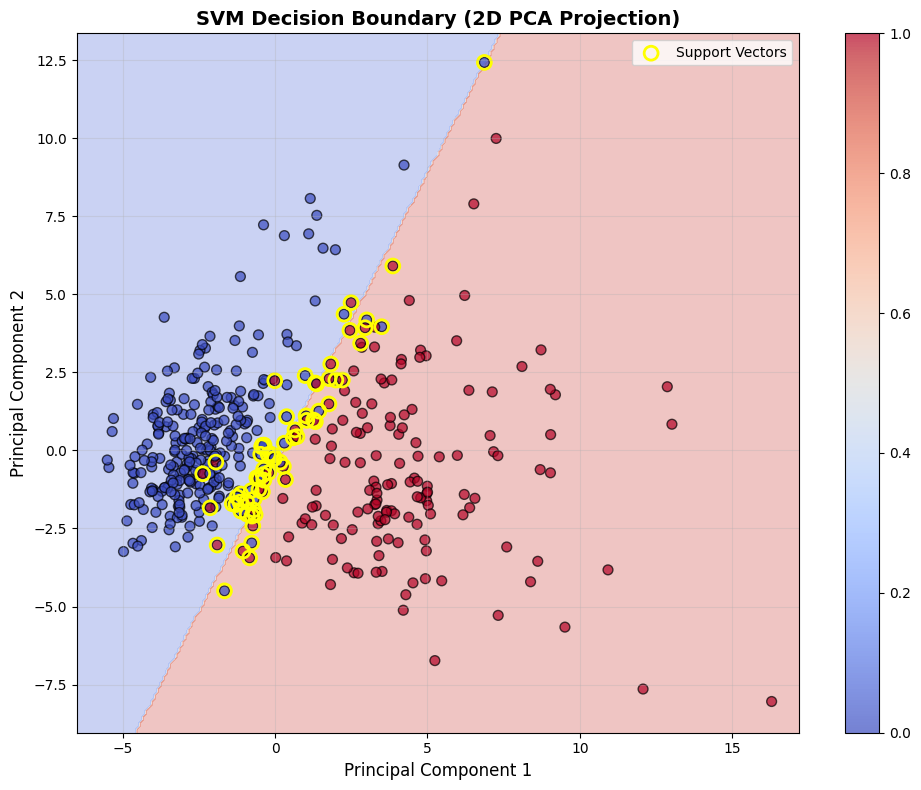

In [ ]:
# For visualization, let's use 2 most important features
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_scaled)
X_test_2d = pca.transform(X_test_scaled)

# Train SVM on 2D data
svm_2d = SVC(kernel='linear', C=1.0, random_state=42)
svm_2d.fit(X_train_2d, y_train)

print(f"\nVariance explained by 2 principal components: {np.sum(pca.explained_variance_ratio_):.2%}")

# Create mesh grid for decision boundary
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

    # Plot training points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y,
                          cmap=plt.cm.coolwarm,
                          edgecolors='k', s=50, alpha=0.7)

    # Plot support vectors
    plt.scatter(clf.support_vectors_[:, 0],
                clf.support_vectors_[:, 1],
                s=100, facecolors='none',
                edgecolors='yellow', linewidths=2,
                label='Support Vectors')

    plt.xlabel('Principal Component 1', fontsize=12)
    plt.ylabel('Principal Component 2', fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend()
    plt.colorbar(scatter)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

plot_decision_boundary(svm_2d, X_train_2d, y_train,
                       'SVM Decision Boundary (2D PCA Projection)')


COMPARING DIFFERENT SVM KERNELS

Training SVM with LINEAR kernel...
  Accuracy: 0.9561
  ROC-AUC: 0.9964
  Support Vectors: 35

Training SVM with POLY kernel...
  Accuracy: 0.8684
  ROC-AUC: 0.9964
  Support Vectors: 147

Training SVM with RBF kernel...
  Accuracy: 0.9825
  ROC-AUC: 0.9971
  Support Vectors: 110

Training SVM with SIGMOID kernel...
  Accuracy: 0.9561
  ROC-AUC: 0.9840
  Support Vectors: 70

--------------------------------------------------
KERNEL COMPARISON SUMMARY
--------------------------------------------------
 Kernel  Accuracy  ROC-AUC  Support_Vectors
 linear  0.956140 0.996397               35
   poly  0.868421 0.996397              147
    rbf  0.982456 0.997052              110
sigmoid  0.956140 0.983950               70


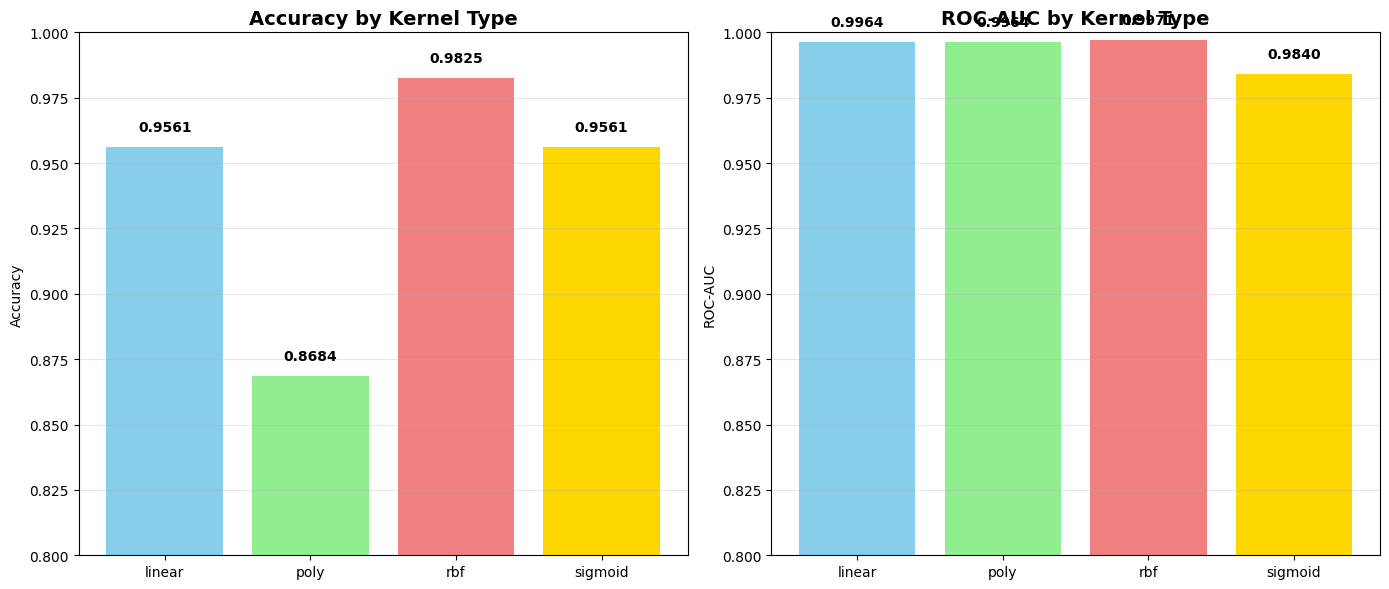

In [ ]:
print("\n" + "="*50)
print("COMPARING DIFFERENT SVM KERNELS")
print("="*50)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = []

for kernel in kernels:
    print(f"\nTraining SVM with {kernel.upper()} kernel...")

    svm = SVC(
        kernel=kernel,
        C=1.0,
        random_state=42,
        probability=True,
        gamma='scale' if kernel in ['rbf', 'poly', 'sigmoid'] else 'auto'
    )

    svm.fit(X_train_scaled, y_train)
    y_pred = svm.predict(X_test_scaled)
    y_pred_proba = svm.predict_proba(X_test_scaled)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    results.append({
        'Kernel': kernel,
        'Accuracy': accuracy,
        'ROC-AUC': roc_auc,
        'Support_Vectors': len(svm.support_vectors_)
    })

    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  ROC-AUC: {roc_auc:.4f}")
    print(f"  Support Vectors: {len(svm.support_vectors_)}")

# Create results DataFrame
results_df = pd.DataFrame(results)
print("\n" + "-"*50)
print("KERNEL COMPARISON SUMMARY")
print("-"*50)
print(results_df.to_string(index=False))

# Visual comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Accuracy comparison
axes[0].bar(results_df['Kernel'], results_df['Accuracy'],
            color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
axes[0].set_title('Accuracy by Kernel Type', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0.8, 1.0)
axes[0].grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(results_df['Accuracy']):
    axes[0].text(i, v + 0.005, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

# ROC-AUC comparison
axes[1].bar(results_df['Kernel'], results_df['ROC-AUC'],
            color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
axes[1].set_title('ROC-AUC by Kernel Type', fontsize=14, fontweight='bold')
axes[1].set_ylabel('ROC-AUC')
axes[1].set_ylim(0.8, 1.0)
axes[1].grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(results_df['ROC-AUC']):
    axes[1].text(i, v + 0.005, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


FEATURE COEFFICIENTS (Linear SVM)
Top 15 Most Important Features:
   Feature  Coefficient  Abs_Coefficient
 Feature_8     1.468086         1.468086
Feature_22     1.185028         1.185028
Feature_11     1.050415         1.050415
Feature_14     0.801323         0.801323
Feature_29     0.758239         0.758239
Feature_27     0.746341         0.746341
 Feature_6    -0.739696         0.739696
 Feature_7     0.677176         0.677176
Feature_20    -0.650194         0.650194
Feature_21     0.586947         0.586947
Feature_24     0.547473         0.547473
Feature_30     0.533983         0.533983
Feature_16    -0.377111         0.377111
Feature_12    -0.373830         0.373830
Feature_19    -0.355476         0.355476


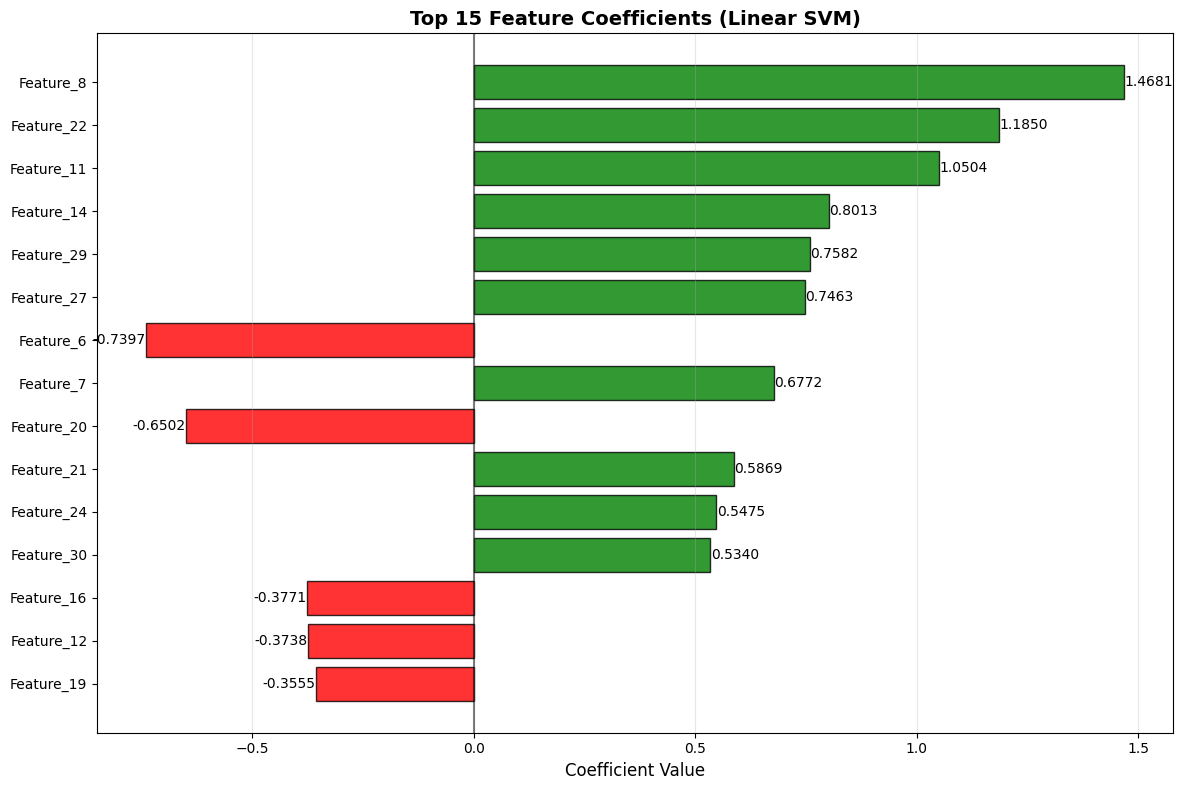

In [ ]:
# For linear SVM, we can extract coefficients
if svm_linear.kernel == 'linear':
    coefficients = svm_linear.coef_[0]

    # Get feature names
    if hasattr(X_train, 'columns'):
        feature_names = X_train.columns
    else:
        feature_names = [f'Feature_{i}' for i in range(X_train.shape[1])]

    # Create coefficient DataFrame
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients,
        'Abs_Coefficient': np.abs(coefficients)
    }).sort_values('Abs_Coefficient', ascending=False)

    print("\n" + "="*50)
    print("FEATURE COEFFICIENTS (Linear SVM)")
    print("="*50)
    print("Top 15 Most Important Features:")
    print(coef_df.head(15).to_string(index=False))

    # Visualize coefficients
    plt.figure(figsize=(12, 8))
    top_n = min(15, len(coef_df))
    top_features = coef_df.head(top_n)

    # Create color based on sign
    colors = ['red' if x < 0 else 'green' for x in top_features['Coefficient']]

    bars = plt.barh(range(len(top_features)), top_features['Coefficient'],
                    color=colors, edgecolor='black', alpha=0.8)
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Coefficient Value', fontsize=12)
    plt.title(f'Top {top_n} Feature Coefficients (Linear SVM)',
              fontsize=14, fontweight='bold')
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.5)
    plt.grid(axis='x', alpha=0.3)

    # Add value labels
    for i, (bar, coef) in enumerate(zip(bars, top_features['Coefficient'])):
        plt.text(coef + (0.001 if coef >= 0 else -0.001),
                 bar.get_y() + bar.get_height()/2,
                 f'{coef:.4f}',
                 ha='left' if coef >= 0 else 'right',
                 va='center', fontsize=10)

    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

print("\n" + "="*50)
print("HYPERPARAMETER TUNING WITH GRID SEARCH")
print("="*50)

# Define parameter grid for RBF kernel
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly']
}

# Create base SVM
svm_base = SVC(probability=True, random_state=42)

# Instantiate grid search
grid_search = GridSearchCV(
    estimator=svm_base,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("Performing grid search... (this may take a while)")
grid_search.fit(X_train_scaled, y_train)

print(f"\nBest parameters found:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Use the best model
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Test accuracy with tuned model: {accuracy_best:.4f}")


HYPERPARAMETER TUNING WITH GRID SEARCH
Performing grid search... (this may take a while)
Fitting 5 folds for each of 60 candidates, totalling 300 fits

Best parameters found:
  C: 10
  gamma: scale
  kernel: rbf
Best cross-validation accuracy: 0.9758
Test accuracy with tuned model: 0.9737


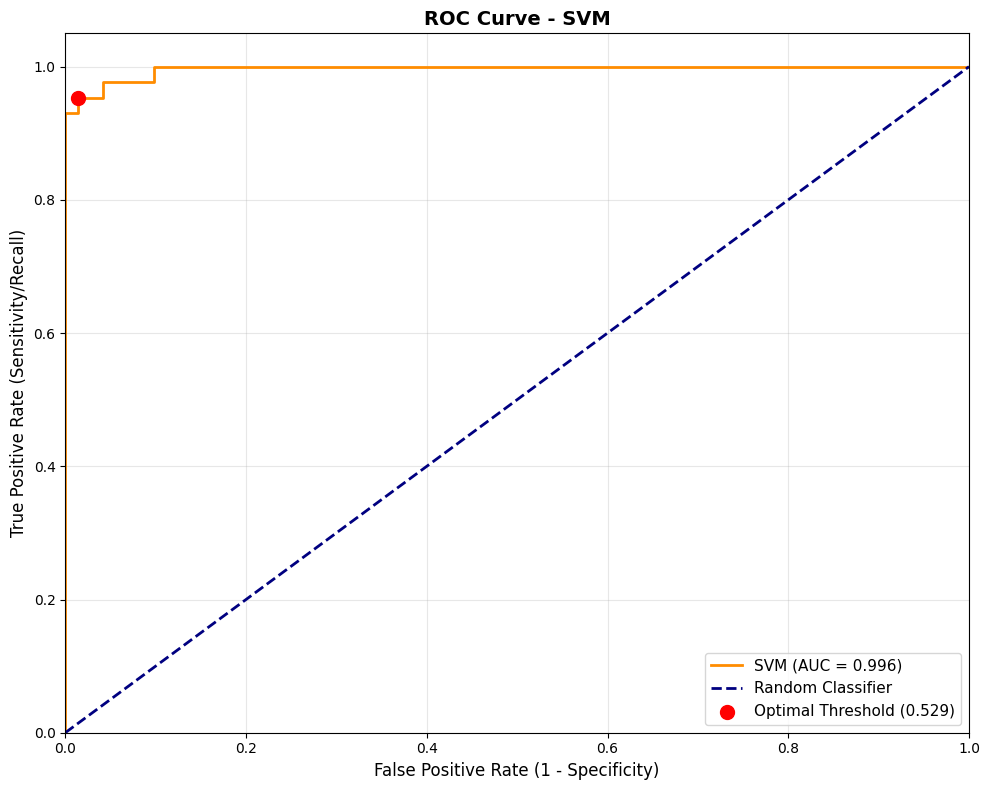


Decision function range: [-8.2958, 19.2237]
Optimal threshold from ROC: 0.5295


In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_svm)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'SVM (AUC = {roc_auc_svm:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')

# Find optimal threshold (Youden's J statistic)
youden_j = tpr - fpr
optimal_idx = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_idx]

plt.scatter(fpr[optimal_idx], tpr[optimal_idx],
            color='red', s=100, zorder=5,
            label=f'Optimal Threshold ({optimal_threshold:.3f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity/Recall)', fontsize=12)
plt.title('ROC Curve - SVM', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Decision function values
decision_function = svm_linear.decision_function(X_test_scaled)
print(f"\nDecision function range: [{decision_function.min():.4f}, {decision_function.max():.4f}]")
print(f"Optimal threshold from ROC: {optimal_threshold:.4f}")

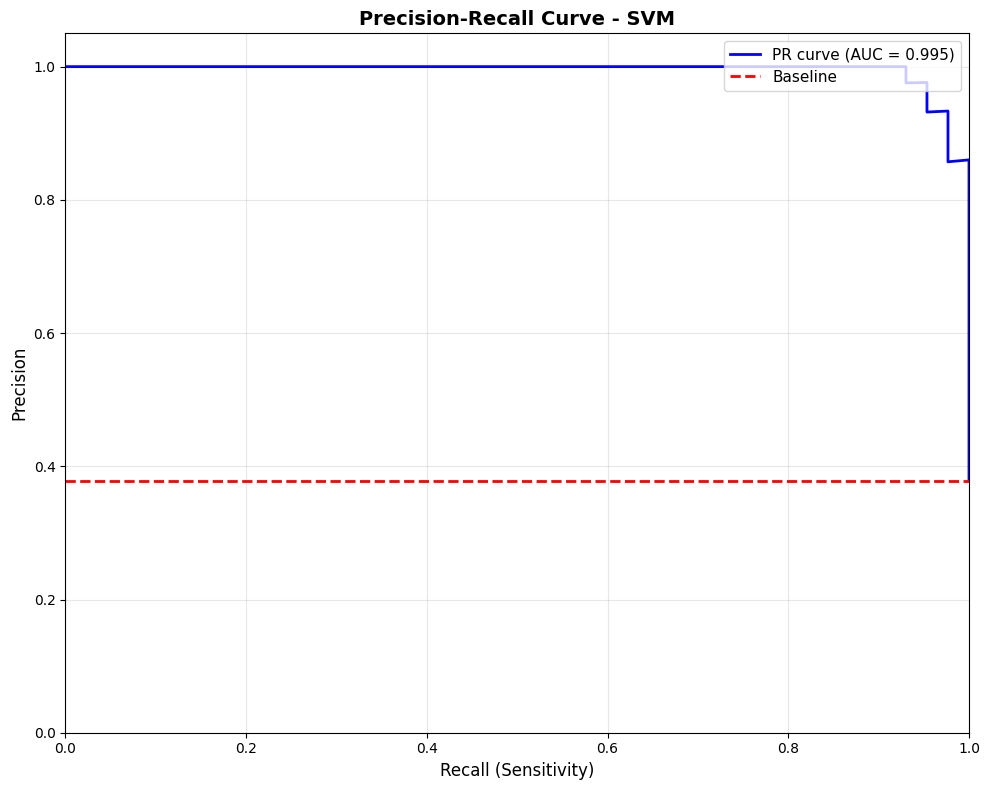


Best F1-Score: 0.9647
Threshold for best F1: 0.5295


In [ ]:
# Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba_svm)
pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.3f})')

# Add no-skill line
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], color='red', lw=2, linestyle='--', label='Baseline')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall (Sensitivity)', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve - SVM', fontsize=14, fontweight='bold')
plt.legend(loc="upper right", fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# F1-Score vs Threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
best_threshold_idx = np.argmax(f1_scores[:-1])  # Exclude last value
best_threshold = thresholds_pr[best_threshold_idx]

print(f"\nBest F1-Score: {f1_scores[best_threshold_idx]:.4f}")
print(f"Threshold for best F1: {best_threshold:.4f}")

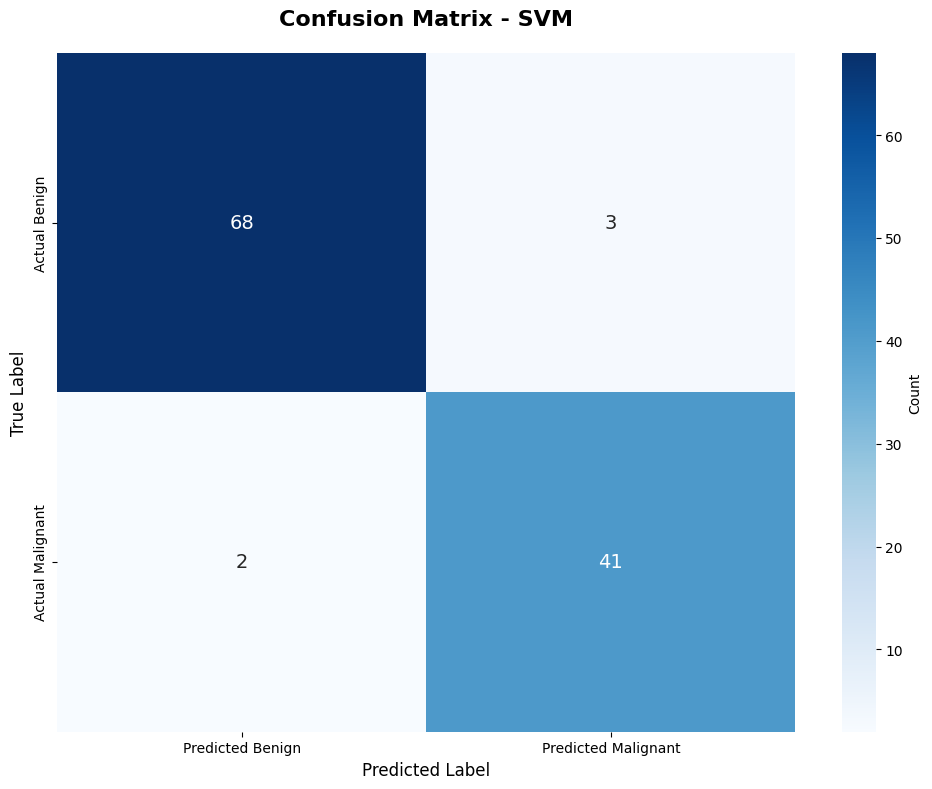

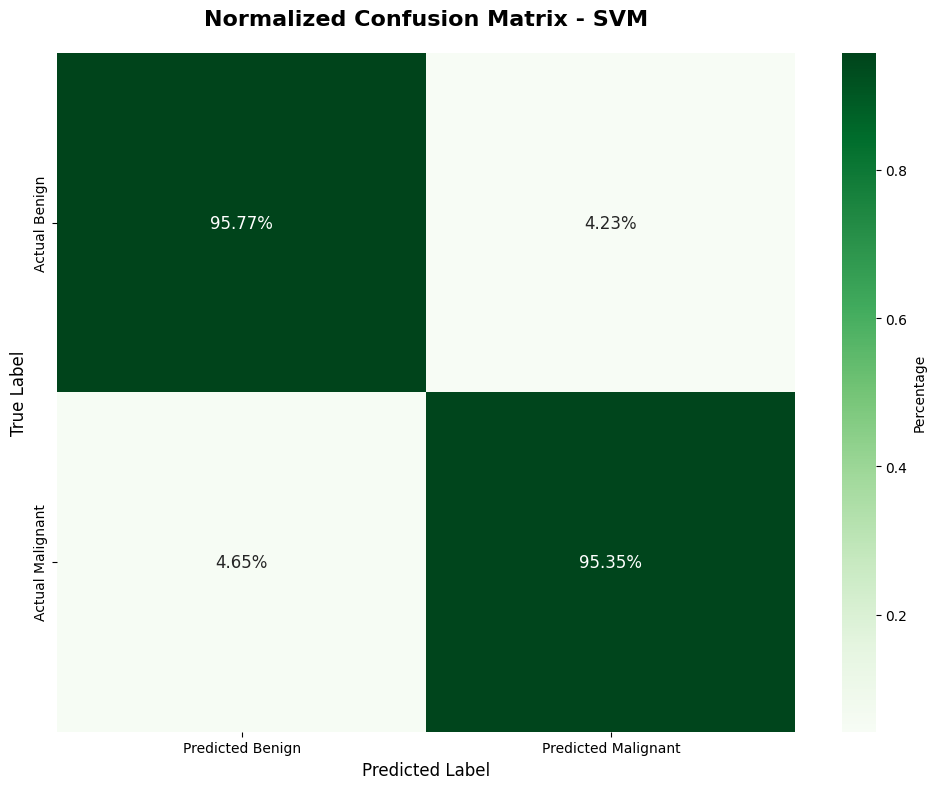

In [ ]:
# Confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_svm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Predicted Benign', 'Predicted Malignant'],
            yticklabels=['Actual Benign', 'Actual Malignant'],
            cbar_kws={'label': 'Count'},
            annot_kws={'size': 14})

plt.title('Confusion Matrix - SVM', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Normalized confusion matrix
cm_normalized = cm_svm.astype('float') / cm_svm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized,
            annot=True,
            fmt='.2%',
            cmap='Greens',
            xticklabels=['Predicted Benign', 'Predicted Malignant'],
            yticklabels=['Actual Benign', 'Actual Malignant'],
            cbar_kws={'label': 'Percentage'},
            annot_kws={'size': 12})

plt.title('Normalized Confusion Matrix - SVM', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# Your input for prediction
input_text = (-0.23717126, -0.64487029, -0.11382239, -0.57427777, -0.60294971,
        1.0897546 ,  0.91543814,  0.41448279,  0.09311633,  1.78465117,
        2.11520208,  0.28454765, -0.31910982,  0.2980991 ,  0.01968238,
       -0.47096352,  0.45757106,  0.28733283, -0.23125455,  0.26417944,
        0.66325388,  0.12170193,  0.42656325,  0.36885508,  0.02065602,
        1.39513782,  2.0973271 ,  2.01276347,  0.61938913,  2.9421769 ,
        3.15970842)

np_df = np.asarray(input_text).reshape(1, -1)
np_df_scaled = scaler.transform(np_df)

# Make prediction with basic SVM
pred_svm = svm_linear.predict(np_df_scaled)[0]
pred_proba_svm = svm_linear.predict_proba(np_df_scaled)[0]
decision_value = svm_linear.decision_function(np_df_scaled)[0]

# Make prediction with tuned SVM if available
if 'best_svm' in locals():
    pred_best = best_svm.predict(np_df_scaled)[0]
    pred_proba_best = best_svm.predict_proba(np_df_scaled)[0]
    decision_value_best = best_svm.decision_function(np_df_scaled)[0]

print("\n" + "="*60)
print("SINGLE PREDICTION - SUPPORT VECTOR MACHINE")
print("="*60)

print(f"\n🔹 Basic Linear SVM:")
print(f"   Raw Prediction: {pred_svm}")
print(f"   Decision Function Value: {decision_value:.6f}")
print(f"   Probabilities: [Benign: {pred_proba_svm[0]:.4f}, Malignant: {pred_proba_svm[1]:.4f}]")
print(f"   Prediction: {'MALIGNANT (Cancerous) ' if pred_svm == 1 else 'BENIGN (Not Cancerous) '}")
print(f"   Confidence: {max(pred_proba_svm):.2%}")

if 'best_svm' in locals():
    print(f"\n🔹 Tuned SVM ({best_svm.kernel} kernel):")
    print(f"   Raw Prediction: {pred_best}")
    print(f"   Decision Function Value: {decision_value_best:.6f}")
    print(f"   Probabilities: [Benign: {pred_proba_best[0]:.4f}, Malignant: {pred_proba_best[1]:.4f}]")
    print(f"   Prediction: {'MALIGNANT (Cancerous) ' if pred_best == 1 else 'BENIGN (Not Cancerous) '}")
    print(f"   Confidence: {max(pred_proba_best):.2%}")

# Interpretation of decision function
print(f"\n🔹 Decision Function Interpretation:")
print(f"   Positive values → Higher confidence for Malignant")
print(f"   Negative values → Higher confidence for Benign")
print(f"   Zero → Decision boundary")
print(f"   Magnitude → Distance from decision boundary (confidence)")


SINGLE PREDICTION - SUPPORT VECTOR MACHINE

🔹 Basic Linear SVM:
   Raw Prediction: 1
   Decision Function Value: 5.145789
   Probabilities: [Benign: 0.0028, Malignant: 0.9972]
   Prediction: MALIGNANT (Cancerous) 
   Confidence: 99.72%

🔹 Tuned SVM (rbf kernel):
   Raw Prediction: 1
   Decision Function Value: 1.857025
   Probabilities: [Benign: 0.0030, Malignant: 0.9970]
   Prediction: MALIGNANT (Cancerous) 
   Confidence: 99.70%

🔹 Decision Function Interpretation:
   Positive values → Higher confidence for Malignant
   Negative values → Higher confidence for Benign
   Zero → Decision boundary
   Magnitude → Distance from decision boundary (confidence)



CROSS-VALIDATION RESULTS (5-fold)
CV Scores: [0.96703297 0.96703297 0.98901099 0.96703297 0.94505495]
Mean CV Accuracy: 0.9670 (±0.0139)


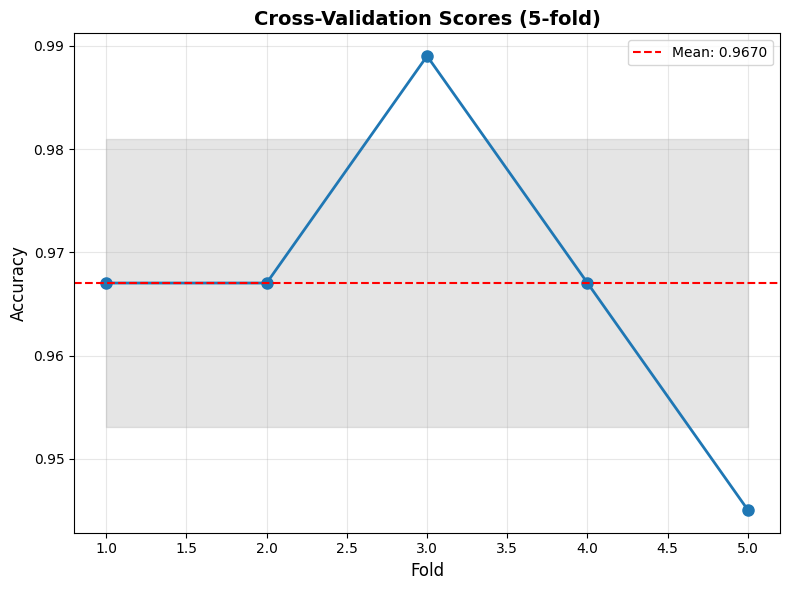

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation
cv_scores = cross_val_score(svm_linear, X_train_scaled, y_train,
                            cv=5, scoring='accuracy')

print("\n" + "="*50)
print("CROSS-VALIDATION RESULTS (5-fold)")
print("="*50)
print(f"CV Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

# Visualize cross-validation
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), cv_scores, 'o-', linewidth=2, markersize=8)
plt.axhline(y=cv_scores.mean(), color='r', linestyle='--',
            label=f'Mean: {cv_scores.mean():.4f}')
plt.fill_between(range(1, 6),
                  cv_scores.mean() - cv_scores.std(),
                  cv_scores.mean() + cv_scores.std(),
                  alpha=0.2, color='gray')
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Cross-Validation Scores (5-fold)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


MODEL COMPARISON

SVM Kernel Comparison:
        Model  Accuracy
 SVM (Linear)  0.956140
    SVM (RBF)  0.868421
   SVM (Poly)  0.982456
SVM (Sigmoid)  0.956140


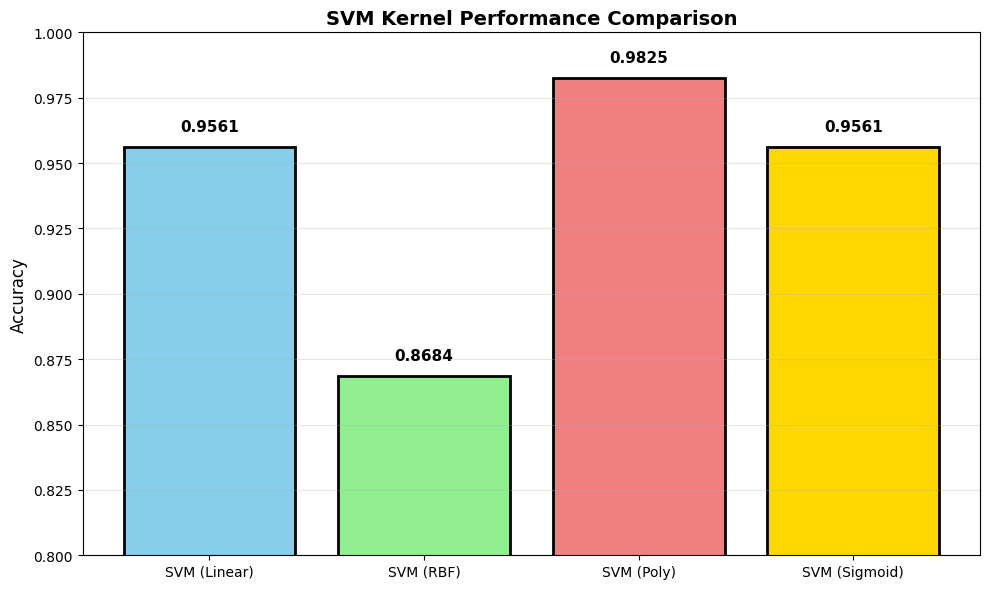

In [ ]:
# Compare with other models
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)

# You can add your previous model accuracies here
# For example, if you have Logistic Regression accuracy:
# comparison_df = pd.DataFrame({
#     'Model': ['Logistic Regression', 'Random Forest', 'SVM (Linear)', 'SVM (Tuned)'],
#     'Accuracy': [acc_lr, acc_rf, accuracy_svm, accuracy_best]
# })

# For now, let's create a placeholder
comparison_data = {
    'Model': ['SVM (Linear)', 'SVM (RBF)', 'SVM (Poly)', 'SVM (Sigmoid)'],
    'Accuracy': [accuracy_svm] + [r['Accuracy'] for r in results if r['Kernel'] != 'linear']
}

comparison_df = pd.DataFrame(comparison_data)
print("\nSVM Kernel Comparison:")
print(comparison_df.to_string(index=False))

# Visual comparison
plt.figure(figsize=(10, 6))
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold']
bars = plt.bar(comparison_df['Model'], comparison_df['Accuracy'],
               color=colors, edgecolor='black', linewidth=2)

plt.ylim(0.8, 1.0)
plt.ylabel('Accuracy', fontsize=12)
plt.title('SVM Kernel Performance Comparison', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Add value labels
for bar, acc in zip(bars, comparison_df['Accuracy']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f'{acc:.4f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
import joblib

# Save the trained model and scaler
joblib.dump(svm_linear, 'svm_poly_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("\n SVM model saved as 'svm_model.pkl'")
print("Scaler saved as 'scaler.pkl'")

# To load and use later:
# loaded_model = joblib.load('svm_model.pkl')
# loaded_scaler = joblib.load('scaler.pkl')
# new_data_scaled = loaded_scaler.transform(new_data)
# predictions = loaded_model.predict(new_data_scaled)


 SVM model saved as 'svm_model.pkl'
Scaler saved as 'scaler.pkl'
